In [1]:
%load_ext lab_black

In [71]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [46]:
principals = pd.read_csv("data/title_principals.tsv", sep="\t", low_memory=False)
names = pd.read_csv("data/name_basics.tsv", sep="\t", low_memory=False)
names = names[["nconst", "primaryName", "birthYear"]]

In [47]:
names.birthYear.replace({"\\N": 0}, inplace=True)
names.birthYear = pd.to_numeric(names.birthYear)
names = names[names.birthYear > 1910]
names.dropna(inplace=True)

In [5]:
actors = pd.read_csv("data/actors/1.csv", encoding="ansi")[["Const", "Name"]]
actors2 = pd.read_csv("data/actors/2.csv", encoding="ansi")[["Const", "Name"]]
actors3 = pd.read_csv("data/actors/3.csv", encoding="ansi")[["Const", "Name"]]
actors4 = pd.read_csv("data/actors/4.csv", encoding="ansi")[["Const", "Name"]]
actors5 = pd.read_csv("data/actors/5.csv", encoding="ansi")[["Const", "Name"]]
actors6 = pd.read_csv("data/actors/6.csv", encoding="ansi")[["Const", "Name"]]
actors7 = pd.read_csv("data/actors/7.csv", encoding="ansi")[["Const", "Name"]]
actors9 = pd.read_csv("data/actors/9.csv", encoding="ansi")[["Const", "Name"]]
actors10 = pd.read_csv("data/actors/10.csv", encoding="ansi")[["Const", "Name"]]
actors11 = pd.read_csv("data/actors/11.csv", encoding="ansi")[["Const", "Name"]]
actors12 = pd.read_csv("data/actors/12.csv", encoding="ansi")[["Const", "Name"]]
actors13 = pd.read_csv("data/actors/13.csv", encoding="ansi")[["Const", "Name"]]
actors = pd.concat(
    [
        actors,
        actors2,
        actors3,
        actors4,
        actors5,
        actors6,
        actors7,
        actors9,
        actors10,
        actors11,
        actors12,
        actors13,
    ]
)
actors.drop_duplicates(inplace=True)

In [48]:
principals = principals[["nconst", "tconst"]]

In [49]:
titles = pd.read_csv("titles_id.csv", header=None)
titles_list = list(titles[1])

In [50]:
choosen_actors = names[names.nconst.isin(list(actors.Const))]

In [51]:
principals = principals[principals.nconst.isin(choosen_actors.nconst)]

In [52]:
principals = principals[principals.tconst.isin(titles_list)]

In [56]:
principals = principals.merge(choosen_actors, how="inner", on="nconst")

In [58]:
principals.drop(columns="nconst", inplace=True)

In [60]:
movies_with_years = pd.read_csv("data/movies_with_ratings.csv")[["tconst", "startYear"]]

In [63]:
principals_and_movies = principals.merge(movies_with_years, how="inner", on="tconst")

In [65]:
principals_and_movies["age_when_premiere"] = (
    principals_and_movies.startYear - principals_and_movies.birthYear
)

In [67]:
principals_and_movies.drop(columns=["birthYear", "startYear"], inplace=True)

C:\Users\Alicja Kocieniewska\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'wiek')

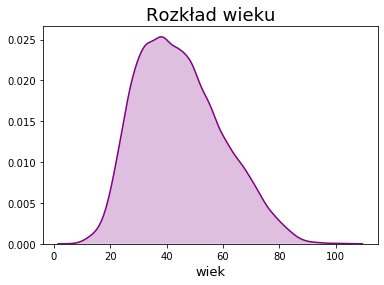

In [70]:
sns.kdeplot(
    principals_and_movies.age_when_premiere,
    shade=True,
    color="purple",
    kernel="gau",
    legend=False,
)
plt.title("Rozkład wieku", fontsize=18)
plt.xlabel("wiek", fontsize=13)

In [77]:
age_median = principals_and_movies.age_when_premiere.median()

In [78]:
principals_and_movies["age_category"] = np.where(
    principals_and_movies["age_when_premiere"] < age_median, "younger", "older"
)

In [80]:
principals_and_movies.drop(columns="age_when_premiere", inplace=True)

In [81]:
principals_and_movies

,tconst,primaryName,age_category
0,tt0035423,Meg Ryan,younger
1,tt0035423,Hugh Jackman,younger
2,tt0035423,Liev Schreiber,younger
3,tt0101761,Meg Ryan,younger
4,tt0101761,Val Kilmer,younger
5,tt0101761,Kyle MacLachlan,younger
6,tt0105165,Meg Ryan,younger
7,tt0105165,Kathy Bates,older
8,tt0105165,Alec Baldwin,younger
9,tt0106926,Meg Ryan,younger


In [83]:
principals_and_movies["actor_in_movie"] = (
    principals_and_movies["primaryName"] + "_" + principals_and_movies["age_category"]
)

In [86]:
principals_and_movies.drop(columns=["primaryName", "age_category"], inplace=True)

In [88]:
def get_dummies(data, column):
    """Return movies dataset with dummy genre variables."""
    subset = data[column].str.get_dummies(sep=",")
    data.index = subset.index
    final_df = pd.concat([data, subset], axis=1)
    final_df.drop(columns=[column], inplace=True)
    return(final_df)

In [91]:
actors_final = (
    principals_and_movies.groupby("tconst")["actor_in_movie"]
    .apply(lambda x: ",".join(x))
    .reset_index()
)

In [102]:
actors_final

,tconst,actor_in_movie
0,tt0035423,"Meg Ryan_younger,Hugh Jackman_younger,Liev Sch..."
1,tt0069049,Orson Welles_older
2,tt0081145,Danny Aiello_older
3,tt0087126,Farley Granger_older
4,tt0096056,"Vanessa Redgrave_older,John Hurt_older"
5,tt0097631,Elliott Gould_older
6,tt0097775,Jet Li_younger
7,tt0099059,John Saxon_older
8,tt0099072,Kristin Scott Thomas_younger
9,tt0099194,"Donald Sutherland_older,Geraldine Chaplin_older"


In [94]:
actors_dummies = get_dummies(actors_final, "actor_in_movie")

In [101]:
actors_dummies.to_csv("data/actors_data.csv")